PROBLEM STATEMENT: 

    Classifying pistachio image dataset

By: Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link: https://www.muratkoklu.com/datasets/vtdhnd12.php

### Import the dataset

In [11]:
# Extracting the zip file
import zipfile
zip_ref = zipfile.ZipFile("Pistachio_Image_Dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [12]:
import os

for dirpath, dirnames, filenames in os.walk("Pistachio_Image_Dataset/Pistachio_Image_Dataset/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} image[s] in '{dirpath}'")

There are 2 directories and 1 image[s] in 'Pistachio_Image_Dataset/Pistachio_Image_Dataset/'
There are 0 directories and 1232 image[s] in 'Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio'
There are 0 directories and 916 image[s] in 'Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio'


In [14]:
# Acquiring class names
import pathlib
import numpy as np

# New Method - use this from now on!!!
data_dir = pathlib.Path("Pistachio_Image_Dataset/Pistachio_Image_Dataset/")
class_names = np.array(sorted(item.name for item in data_dir.iterdir()))
class_names = [c for c in class_names if c!= 'Pistachio_Image_Dataset_Request.txt']
class_names

['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [15]:
len(class_names)

2

In [ ]:
# Plotting random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    # Getting random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    # Read in image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image Shape: {img.shape}")
    
    return img

Image Shape: (600, 600, 3)


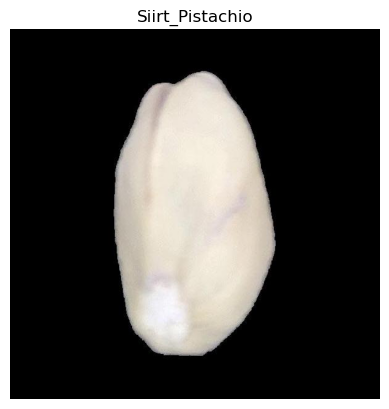

In [11]:
img = view_random_image(target_dir = "Pistachio_Image_Dataset/Pistachio_Image_Dataset/", target_class = "Siirt_Pistachio")

In [12]:
### Splitting into training and testing
import splitfolders

splitfolders.ratio("Pistachio_Image_Dataset/Pistachio_Image_Dataset/", output = "output_pistachio", seed = 1345, ratio = (0.8, 0.2))

Copying files: 2148 files [00:03, 648.01 files/s]


In [4]:
import tensorflow as tf
from tensorflow import keras
# Train and test dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory("output_pistachio/train/",
                                                              seed = 123,
                                                              image_size = (224, 224),
                                                              batch_size = 64)
test_ds = tf.keras.preprocessing.image_dataset_from_directory("output_pistachio/val",
                                                            seed = 123, 
                                                            image_size = (224, 224),
                                                            batch_size = 64)

Found 1717 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


In [14]:
len(class_names)

2

In [15]:
class_names

['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [11]:
# MODEL CREATING 
from tensorflow import keras 
model = keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")  
])
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0

In [20]:
hist_1 = model.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 64,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 105s 4s/step - loss: 0.3628 - accuracy: 0.8323 - val_loss: 0.3630 - val_accuracy: 0.8631
Epoch 2/20
27/27 [==============================] - 95s 3s/step - loss: 0.3335 - accuracy: 0.8608 - val_loss: 0.3420 - val_accuracy: 0.8770
Epoch 3/20
 5/27 [====>.........................] - ETA: 1:12 - loss: 0.3228 - accuracy: 0.8594

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_ds)

In [7]:
def plot_loss_curves(history, figsize):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
    

  # Plot loss
  plt.figure(figsize = figsize)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure(figsize = figsize)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
plot_loss_curves(hist_1, figsize = (10, 5))

In [21]:
# RELU, ADAM, PADDING = VALID

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_3 = model.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 64,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 90s 3s/step - loss: 0.9208 - accuracy: 0.6733 - val_loss: 0.5367 - val_accuracy: 0.7865
Epoch 2/20
27/27 [==============================] - 87s 3s/step - loss: 0.4306 - accuracy: 0.7956 - val_loss: 0.4702 - val_accuracy: 0.7912
Epoch 3/20
27/27 [==============================] - 86s 3s/step - loss: 0.3830 - accuracy: 0.8189 - val_loss: 0.4033 - val_accuracy: 0.8237
Epoch 4/20
27/27 [==============================] - 92s 3s/step - loss: 0.4103 - accuracy: 0.8107 - val_loss: 0.4005 - val_accuracy: 0.8515
Epoch 5/20
27/27 [==============================] - 101s 4s/step - loss: 0.3578 - accuracy: 0.8427 - val_loss: 0.3686 - val_accuracy: 0.8608
Epoch 6/20
27/27 [==============================] - 106s 4s/step - loss: 0.3376 - accuracy: 0.8451 - val_loss: 0.3626 - val_accuracy: 0.8515
Epoch 7/20
27/27 [==============================] - 105s 4s/step - loss: 0.3300 - accuracy: 0.8503 - val_loss: 0.3488 - val_accuracy: 0.8538
Epoch 8/20
27/27 

In [23]:
model.evaluate(test_ds)

7/7 [==============================] - 8s 962ms/step - loss: 0.2084 - accuracy: 0.9327


[0.20836806297302246, 0.9327146410942078]

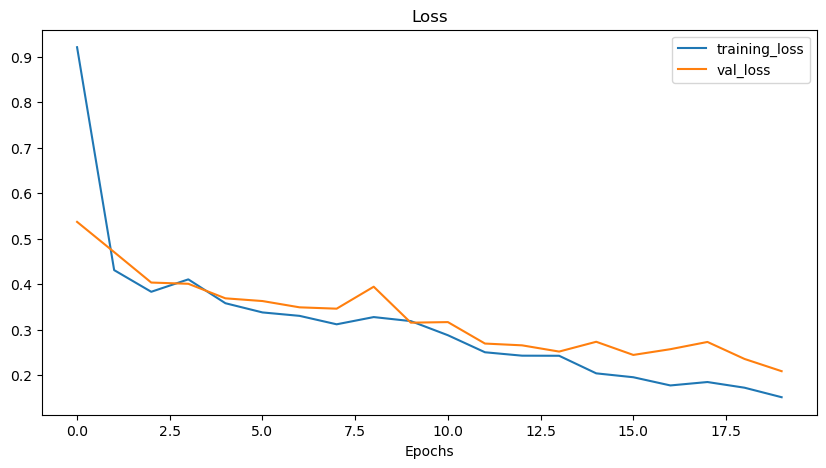

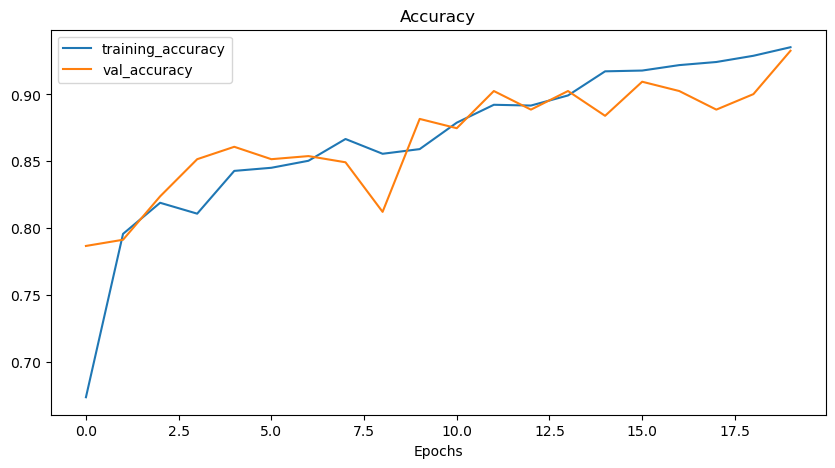

In [28]:
plot_loss_curves(hist_3, figsize = (10, 5))

In [29]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])

model_2.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_4 = model_2.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 64,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 135s 5s/step - loss: 0.5825 - accuracy: 0.7047 - val_loss: 0.4872 - val_accuracy: 0.7912
Epoch 2/20
27/27 [==============================] - 128s 5s/step - loss: 0.4229 - accuracy: 0.7950 - val_loss: 0.4157 - val_accuracy: 0.8190
Epoch 3/20
27/27 [==============================] - 130s 5s/step - loss: 0.3859 - accuracy: 0.8206 - val_loss: 0.3614 - val_accuracy: 0.8515
Epoch 4/20
27/27 [==============================] - 132s 5s/step - loss: 0.3863 - accuracy: 0.8200 - val_loss: 0.4103 - val_accuracy: 0.8167
Epoch 5/20
27/27 [==============================] - 137s 5s/step - loss: 0.3781 - accuracy: 0.8288 - val_loss: 0.3460 - val_accuracy: 0.8469
Epoch 6/20
27/27 [==============================] - 134s 5s/step - loss: 0.3736 - accuracy: 0.8241 - val_loss: 0.3563 - val_accuracy: 0.8515
Epoch 7/20
27/27 [==============================] - 138s 5s/step - loss: 0.3350 - accuracy: 0.8468 - val_loss: 0.3523 - val_accuracy: 0.8492
Epoch 8/20
27

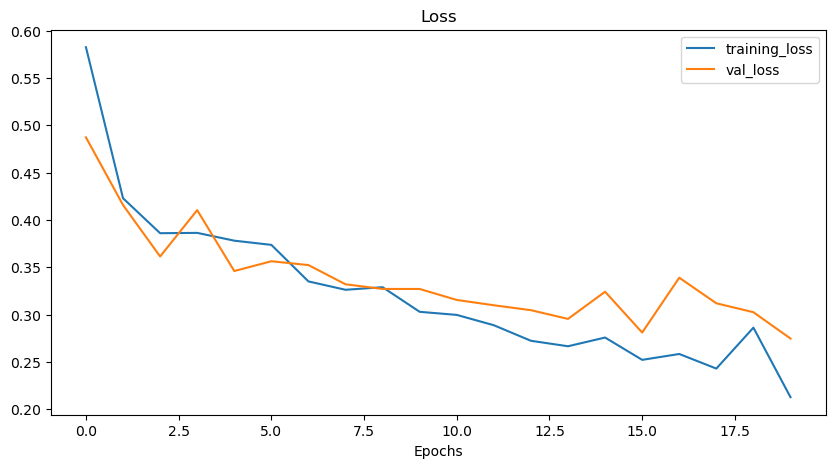

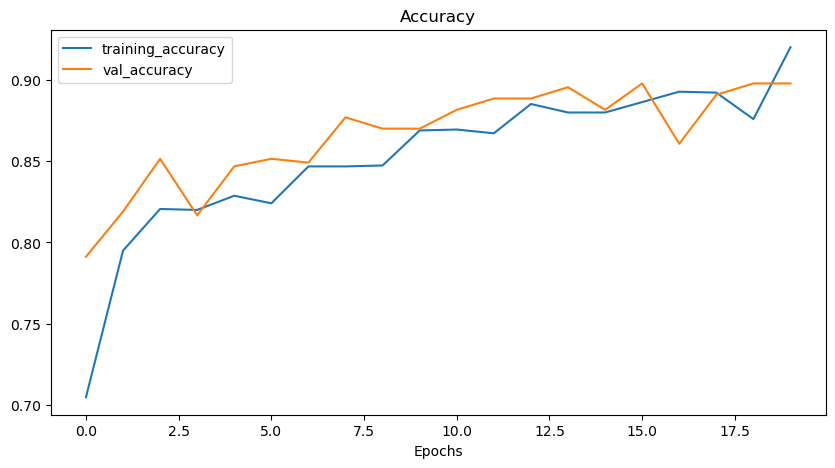

In [30]:
plot_loss_curves(hist_4, figsize = (10, 5))

In [15]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.20),
    
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])

model_3.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_5 = model_3.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 8,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 47s 2s/step - loss: 0.8717 - accuracy: 0.5871 - val_loss: 0.6475 - val_accuracy: 0.7053
Epoch 2/20
27/27 [==============================] - 46s 2s/step - loss: 0.4883 - accuracy: 0.7641 - val_loss: 0.4230 - val_accuracy: 0.8097
Epoch 3/20
27/27 [==============================] - 46s 2s/step - loss: 0.3923 - accuracy: 0.8229 - val_loss: 0.3745 - val_accuracy: 0.8445
Epoch 4/20
27/27 [==============================] - 46s 2s/step - loss: 0.3648 - accuracy: 0.8352 - val_loss: 0.3790 - val_accuracy: 0.8213
Epoch 5/20
27/27 [==============================] - 46s 2s/step - loss: 0.3552 - accuracy: 0.8381 - val_loss: 0.3975 - val_accuracy: 0.8213
Epoch 6/20
27/27 [==============================] - 46s 2s/step - loss: 0.3197 - accuracy: 0.8596 - val_loss: 0.3204 - val_accuracy: 0.8515
Epoch 7/20
27/27 [==============================] - 47s 2s/step - loss: 0.3153 - accuracy: 0.8556 - val_loss: 0.4214 - val_accuracy: 0.7889
Epoch 8/20
27/27 [==

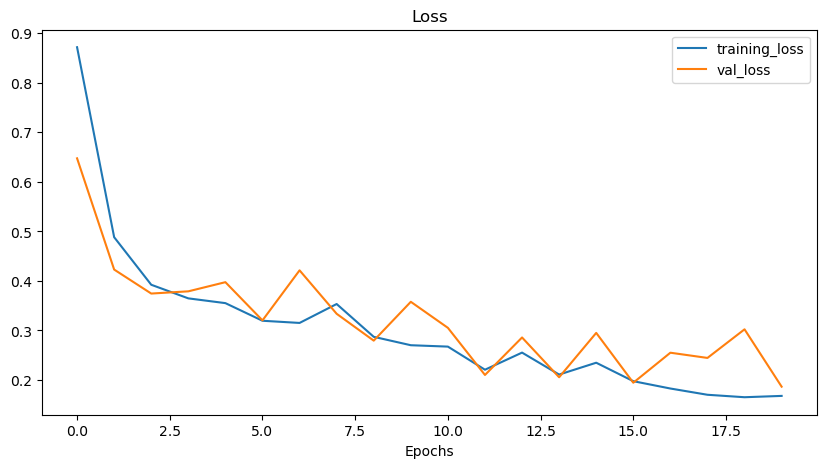

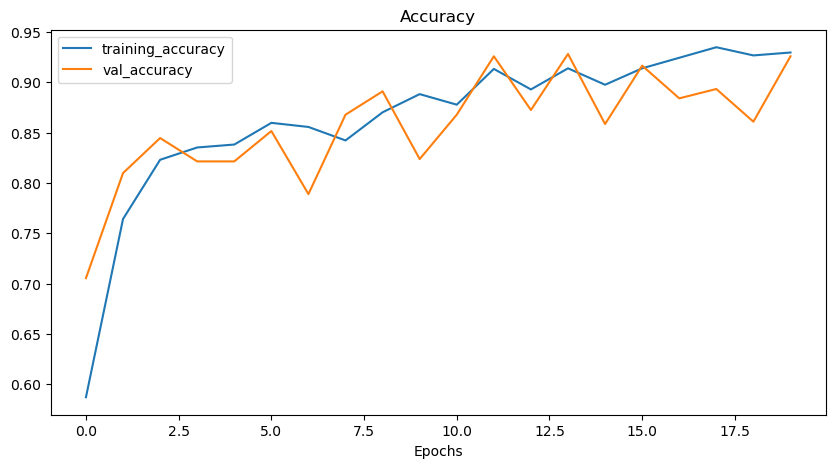

In [16]:
plot_loss_curves(hist_5, figsize = (10, 5))

In [18]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
 
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation = "softmax")
])

model_4.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_6 = model_4.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 32,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 100s 4s/step - loss: 0.5049 - accuracy: 0.7478 - val_loss: 0.3735 - val_accuracy: 0.8283
Epoch 2/20
27/27 [==============================] - 99s 4s/step - loss: 0.3498 - accuracy: 0.8369 - val_loss: 0.3231 - val_accuracy: 0.8794
Epoch 3/20
27/27 [==============================] - 98s 4s/step - loss: 0.3032 - accuracy: 0.8666 - val_loss: 0.4243 - val_accuracy: 0.8051
Epoch 4/20
27/27 [==============================] - 99s 4s/step - loss: 0.2790 - accuracy: 0.8800 - val_loss: 0.2937 - val_accuracy: 0.8724
Epoch 5/20
27/27 [==============================] - 99s 4s/step - loss: 0.2713 - accuracy: 0.8812 - val_loss: 0.3006 - val_accuracy: 0.8794
Epoch 6/20
27/27 [==============================] - 99s 4s/step - loss: 0.2109 - accuracy: 0.9161 - val_loss: 0.3290 - val_accuracy: 0.8677
Epoch 7/20
27/27 [==============================] - 99s 4s/step - loss: 0.2162 - accuracy: 0.9074 - val_loss: 0.3587 - val_accuracy: 0.8677
Epoch 8/20
27/27 [=

In [22]:
model_14 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
 
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
     
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(3, activation = "softmax")
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(32, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
    
])

model_14.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_16 = model_14.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 32,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 141s 5s/step - loss: 0.6731 - accuracy: 0.7228 - val_loss: 0.3738 - val_accuracy: 0.8399
Epoch 2/20
27/27 [==============================] - 123s 4s/step - loss: 0.3769 - accuracy: 0.8282 - val_loss: 0.3378 - val_accuracy: 0.8631
Epoch 3/20
27/27 [==============================] - 108s 4s/step - loss: 0.3350 - accuracy: 0.8480 - val_loss: 0.3426 - val_accuracy: 0.8724
Epoch 4/20
27/27 [==============================] - 105s 4s/step - loss: 0.3428 - accuracy: 0.8579 - val_loss: 0.3969 - val_accuracy: 0.8376
Epoch 5/20
27/27 [==============================] - 106s 4s/step - loss: 0.3105 - accuracy: 0.8672 - val_loss: 0.3425 - val_accuracy: 0.8538
Epoch 6/20
27/27 [==============================] - 106s 4s/step - loss: 0.2621 - accuracy: 0.8870 - val_loss: 0.3233 - val_accuracy: 0.8677
Epoch 7/20
27/27 [==============================] - 106s 4s/step - loss: 0.2048 - accuracy: 0.9202 - val_loss: 0.3102 - val_accuracy: 0.8747
Epoch 8/20
27

In [30]:
model_24 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(filters = 24, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 24, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 48, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 48, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
 
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    #tf.keras.layers.Conv2D(filters = 96, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    #tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    #tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
     
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(3, activation = "softmax")
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(32, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
    
])

model_24.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_26 = model_24.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 32,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 180s 7s/step - loss: 0.9875 - accuracy: 0.7210 - val_loss: 0.3702 - val_accuracy: 0.8469
Epoch 2/20
27/27 [==============================] - 181s 7s/step - loss: 0.3814 - accuracy: 0.8241 - val_loss: 0.3684 - val_accuracy: 0.8353
Epoch 3/20
27/27 [==============================] - 180s 7s/step - loss: 0.3334 - accuracy: 0.8509 - val_loss: 0.3452 - val_accuracy: 0.8608
Epoch 4/20
27/27 [==============================] - 187s 7s/step - loss: 0.2806 - accuracy: 0.8730 - val_loss: 0.3361 - val_accuracy: 0.8608
Epoch 5/20
27/27 [==============================] - 192s 7s/step - loss: 0.2621 - accuracy: 0.8876 - val_loss: 0.3538 - val_accuracy: 0.8492
Epoch 6/20
27/27 [==============================] - 180s 7s/step - loss: 0.2877 - accuracy: 0.8794 - val_loss: 0.3567 - val_accuracy: 0.8422
Epoch 7/20
27/27 [==============================] - 181s 7s/step - loss: 0.2117 - accuracy: 0.9074 - val_loss: 0.3319 - val_accuracy: 0.8677
Epoch 8/20
27

In [31]:
model_34 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(filters = 12, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 12, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 48, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 48, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
 
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    tf.keras.layers.Conv2D(filters = 96, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
     
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(3, activation = "softmax")
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(32, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
    
])

model_34.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_36 = model_34.fit(train_ds,
                   epochs = 20,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 48,
                   verbose = 1)

Epoch 1/20
27/27 [==============================] - 137s 5s/step - loss: 1.3866 - accuracy: 0.7070 - val_loss: 0.4167 - val_accuracy: 0.8167
Epoch 2/20
27/27 [==============================] - 135s 5s/step - loss: 0.4064 - accuracy: 0.8090 - val_loss: 0.3779 - val_accuracy: 0.8329
Epoch 3/20
27/27 [==============================] - 136s 5s/step - loss: 0.3807 - accuracy: 0.8218 - val_loss: 0.3616 - val_accuracy: 0.8329
Epoch 4/20
27/27 [==============================] - 135s 5s/step - loss: 0.3749 - accuracy: 0.8270 - val_loss: 0.3491 - val_accuracy: 0.8492
Epoch 5/20
27/27 [==============================] - 134s 5s/step - loss: 0.3578 - accuracy: 0.8410 - val_loss: 0.3341 - val_accuracy: 0.8561
Epoch 6/20
27/27 [==============================] - 134s 5s/step - loss: 0.3173 - accuracy: 0.8596 - val_loss: 0.2849 - val_accuracy: 0.8840
Epoch 7/20
27/27 [==============================] - 134s 5s/step - loss: 0.2789 - accuracy: 0.8713 - val_loss: 0.2485 - val_accuracy: 0.9049
Epoch 8/20
27

In [5]:
model_44 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(filters = 12, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 12, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Conv2D(filters = 48, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 48, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),
 
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

    tf.keras.layers.Conv2D(filters = 96, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
     
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = "valid", activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = "valid", activation = "relu", kernel_initializer="he_normal"),

    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(3, activation = "softmax")
    
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(32, "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
    
])

model_44.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

hist_46 = model_44.fit(train_ds,
                   epochs = 100,
                   steps_per_epoch = len(train_ds),
                   validation_data = test_ds,
                   validation_steps = len(test_ds),
                   batch_size = 16,
                   verbose = 1)

Epoch 1/100
27/27 [==============================] - 297s 11s/step - loss: 0.7634 - accuracy: 0.7234 - val_loss: 0.4291 - val_accuracy: 0.8144
Epoch 2/100
27/27 [==============================] - 287s 11s/step - loss: 0.4110 - accuracy: 0.8183 - val_loss: 0.3726 - val_accuracy: 0.8260
Epoch 3/100
27/27 [==============================] - 289s 11s/step - loss: 0.3990 - accuracy: 0.8160 - val_loss: 0.3908 - val_accuracy: 0.8376
Epoch 4/100
27/27 [==============================] - 305s 11s/step - loss: 0.3571 - accuracy: 0.8398 - val_loss: 0.3571 - val_accuracy: 0.8492
Epoch 5/100
27/27 [==============================] - 326s 12s/step - loss: 0.3366 - accuracy: 0.8474 - val_loss: 0.3270 - val_accuracy: 0.8585
Epoch 6/100
27/27 [==============================] - 281s 10s/step - loss: 0.3188 - accuracy: 0.8608 - val_loss: 0.3322 - val_accuracy: 0.8538
Epoch 7/100
27/27 [==============================] - 267s 10s/step - loss: 0.2988 - accuracy: 0.8695 - val_loss: 0.2765 - val_accuracy: 0.8933

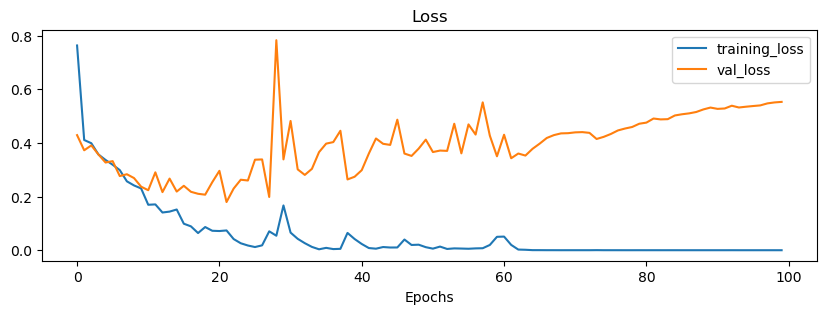

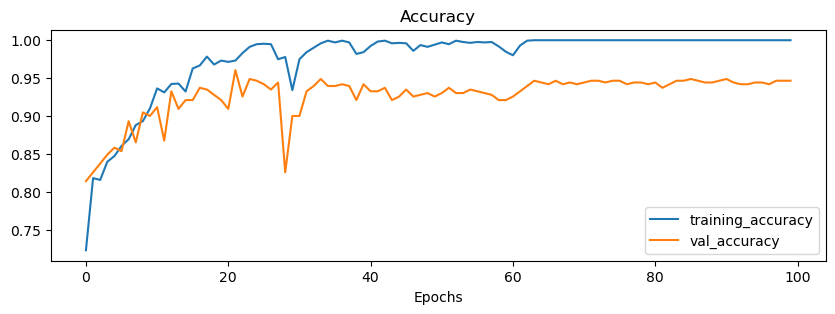

In [10]:
import matplotlib.pyplot as plt
plot_loss_curves(hist_46, figsize = (10, 3))